First, import the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree

In [3]:
df=pd.read_csv("student_types.csv")

In [4]:
df

,Grades,Attendance,Study Hours,Learner Level
0,74,0.161629,4,Average
1,51,0.502679,10,Weak
2,92,0.966655,6,Advanced
3,60,0.663502,6,Average
4,66,0.009197,0,Average
...,...,...,...,...
145,72,0.642032,9,Average
146,84,0.722452,10,Advanced
147,45,0.300878,3,Weak
148,66,0.568309,4,Average


In [6]:
#assign data and column
X=df.drop('Learner Level',axis=1)
y=df['Learner Level']

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
'''The fit_transform() method computes the mean and standard deviation of each feature in the training set and standardizes the features accordingly.Then, the transform() method is used to apply the same transformation to the test set using the scaling parameters learned from the training set.'''
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
#train classifier
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5, min_samples_split=5,min_samples_leaf=5) # defining decision tree classifier
clf=clf.fit(X_train,Y_train) # train data on new data and new target
prediction = clf.predict(X_test) #  assign removed data as input


In [10]:
prediction

array(['Advanced', 'Average', 'Average', 'Weak', 'Advanced', 'Weak',
       'Average', 'Average', 'Weak', 'Weak', 'Average', 'Weak', 'Average',
       'Average', 'Advanced', 'Weak', 'Advanced', 'Average', 'Average',
       'Weak', 'Weak', 'Advanced', 'Advanced', 'Weak', 'Advanced',
       'Average', 'Weak', 'Advanced', 'Average', 'Weak'], dtype=object)

In [11]:
from sklearn.metrics import accuracy_score


we check if our predicted labels match the original labels

In [12]:
#print("Original Labels",X_test)
#print("Labels Predicted",prediction)

print("Train data accuracy:",accuracy_score(y_true =Y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred=prediction))

Train data accuracy: 1.0
Test data accuracy: 1.0


In [13]:
from sklearn import metrics
cf=metrics.confusion_matrix(Y_test,prediction)
cf

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

In [14]:
print("Precision",metrics.precision_score(Y_test,prediction,average=None))

Precision [1. 1. 1.]


In [15]:
print("Recall",metrics.recall_score(Y_test,prediction,average=None))

Recall [1. 1. 1.]


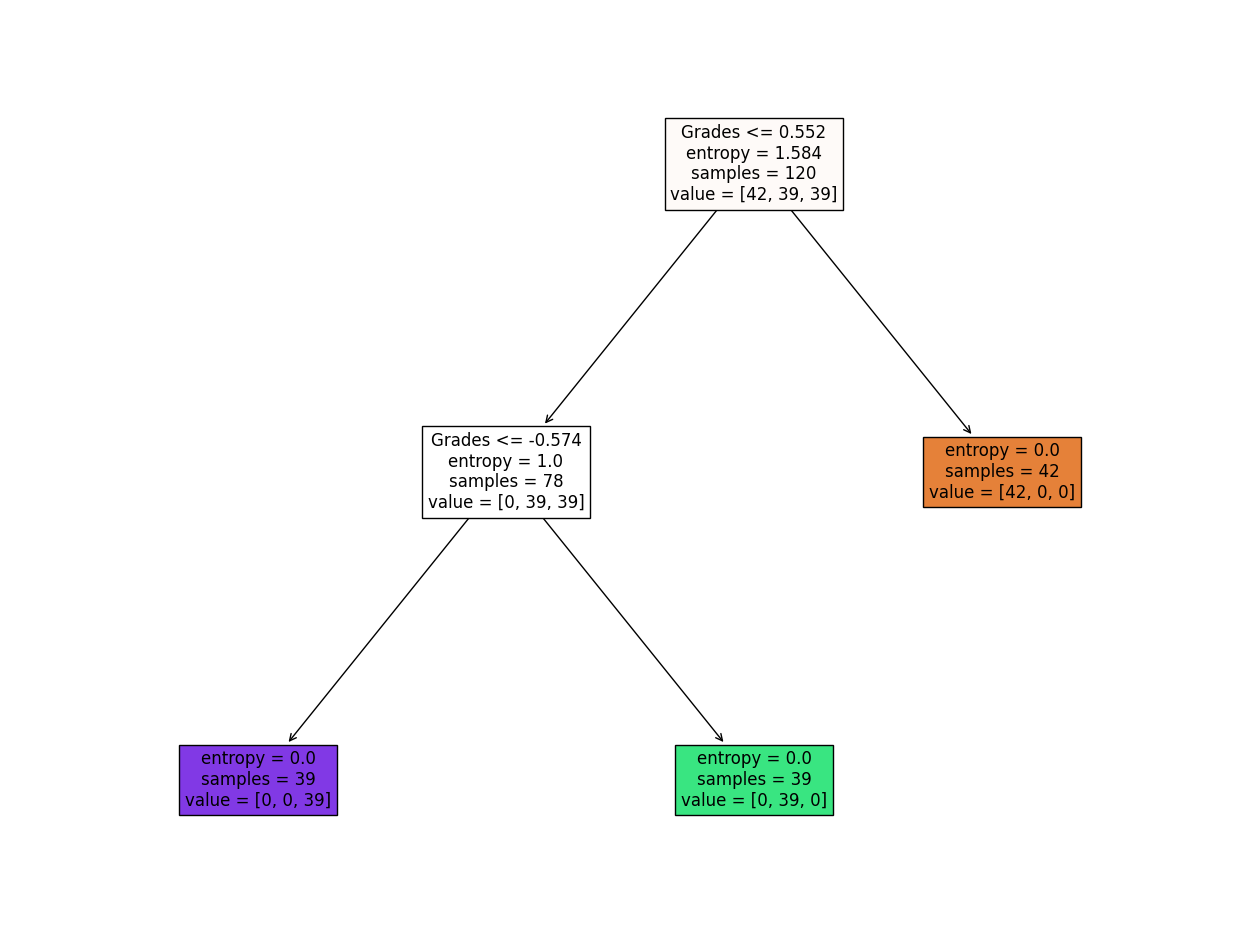

In [16]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(clf, feature_names=X.columns, fontsize=12, filled=True)

In [17]:
feature_importances = clf.feature_importances_

# Now, feature_importances contains the importance of each feature
# You can print or analyze this array to understand which features contribute most to the decision making
print("Feature importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature importances:
Feature 0: 1.0
Feature 1: 0.0
Feature 2: 0.0
